In [2]:
## Author: McKenna Huse
## Purpose: Complete project for CoderGirl class
## Heart Disease Exploration
## Source : https://www.kaggle.com/ronitf/heart-disease-uci
## original data file : heart.csv

##############################

%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

#from sklearn.cross_validation import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(educ_coll_std, average_income_std_vec)

In [3]:
?train_test_split

Object `train_test_split` not found.


In [5]:
## we will first use PCA then Random Forest to generate models for this data

## first we will want to determine which variables we should use for our model.
## we'll also want to visualize this data

# I decided to create a selective "gleaned" dataset in my other file, huse-heartdisease. we will upload that. 
# dfg == dataframe gleaned

dfg = pd.read_csv('gleaned.csv')

In [7]:
from sklearn.model_selection import train_test_split
#X, y = dfg.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

NameError: name 'X' is not defined

In [ ]:
#pca = RandomizedPCA(n_components=2)
#train_x = pca.fit_transform(train_x)
#test_x = pca.transform(test_x)

/Users/mckennahuse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The PCA class was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  This is separate from the ipykernel package so we can avoid doing imports until


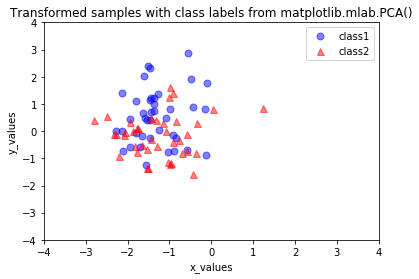

In [16]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(dfg)

plt.plot(mlab_pca.Y[0:40,0],mlab_pca.Y[0:40,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(mlab_pca.Y[40:80,0], mlab_pca.Y[40:80,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()



In [ ]:
from sklearn.linear_model import LinearRegression

## manipulates data in order to use it - vectorize 
X_HD=dfg.values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
vec=X_HDn[:,0]
educ_coll_std=vec.reshape(-1,1)
average_income_std_vec=X_HDn[:,1]
average_income_std=average_income_std_vec.reshape(-1,1)

In [19]:
## this is actually performing the linear regression
clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print(clf1.coef_, clf1.intercept_)

TypeError: fit() missing 1 required positional argument: 'y'